In [48]:
import numpy as np
import pandas as pd
from ISLP import load_data
from ISLP.models import ModelSpec, summarize, poly
import statsmodels.api as sm
from matplotlib.pyplot import subplots
from statsmodels.stats.anova import anova_lm

from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF

In [49]:
rng = np.random.default_rng(1)
x = rng.normal(loc=0, scale=1, size=100)


(array([ 2.,  1.,  6., 11., 15., 22., 24., 15.,  2.,  2.]),
 array([-2.71116248, -2.22826236, -1.74536223, -1.26246211, -0.77956199,
        -0.29666186,  0.18623826,  0.66913838,  1.15203851,  1.63493863,
         2.11783876]),
 <BarContainer object of 10 artists>)

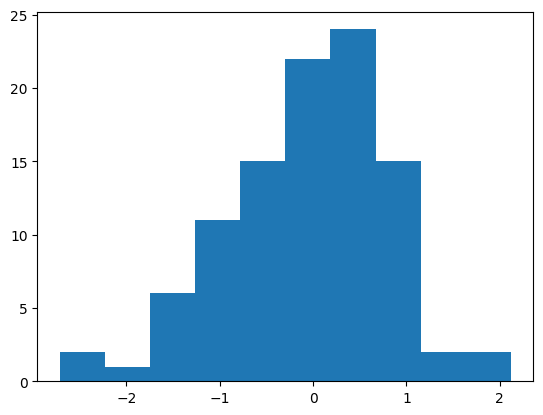

In [50]:
ax = subplots()[1]
ax.hist(x)

(array([ 2.,  3., 12., 17., 22., 22., 12.,  7.,  1.,  2.]),
 array([-0.67782136, -0.53825004, -0.39867872, -0.2591074 , -0.11953608,
         0.02003524,  0.15960656,  0.29917788,  0.4387492 ,  0.57832052,
         0.71789183]),
 <BarContainer object of 10 artists>)

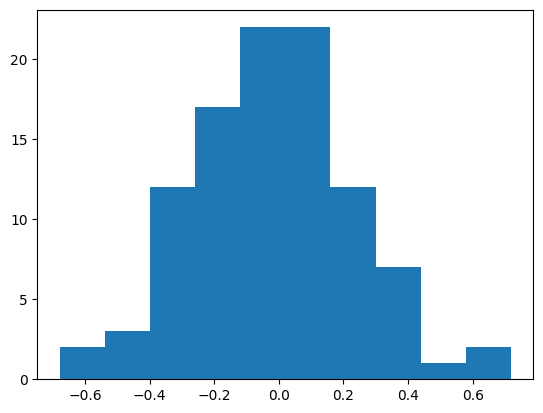

In [51]:
eps = rng.normal(0, 0.25, size=100)
ax = subplots()[1]
ax.hist(eps)

len(Y)=100
b0=-1 b1=0.5


(array([ 1.,  5.,  3., 11., 11., 23., 24., 12.,  8.,  2.]),
 array([-2.52979401, -2.26772896, -2.00566391, -1.74359885, -1.4815338 ,
        -1.21946875, -0.9574037 , -0.69533864, -0.43327359, -0.17120854,
         0.09085651]),
 <BarContainer object of 10 artists>)

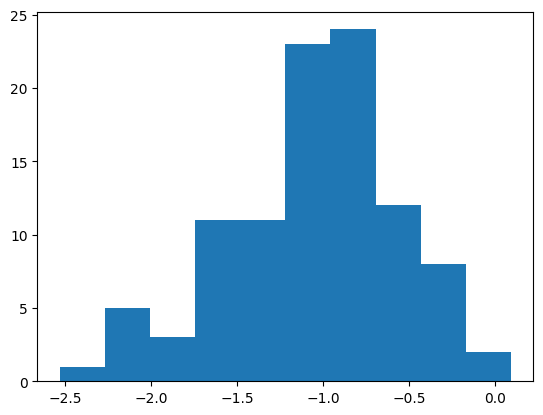

In [52]:
b0 = -1
b1 = 0.5
Y = b0 + b1*x + eps

print(f"{len(Y)=}")
print(f"{b0=} {b1=}")

ax = subplots()[1]
ax.hist(Y)

In [53]:
X = ModelSpec([0]).fit_transform(x.reshape(-1, 1))
result = sm.OLS(Y, X).fit()
pred_b0 = result.params[0]
pred_b1 = result.params[1]

# How do βˆ0 and βˆ1 compare to β0 and β1? - very close
print(f"{pred_b0=:.4f} {pred_b1=:.4f}")
print(f"{b0-pred_b0=:.4f} {b1-pred_b1=:.4f}")

print(f"\n{result.rsquared=}")
summarize(result)


pred_b0=-1.0190 pred_b1=0.4921
b0-pred_b0=0.0190 b1-pred_b1=0.0079

result.rsquared=0.7407603575807877


,coef,std err,t,P>|t|
const,-1.0190,0.025,-40.537,0.0
x1,0.4921,0.029,16.734,0.0


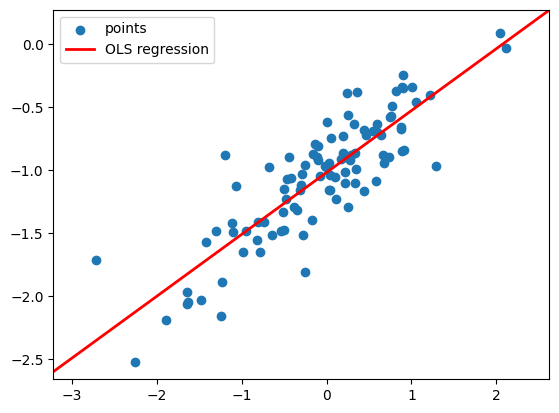

In [54]:
ax = subplots()[1]
ax.scatter(x, Y)
xlim = ax.get_xlim()
ylim = [pred_b0 + pred_b1*xlim[0], pred_b0 + pred_b1*xlim[1]]
ax.axline((xlim[0], ylim[0]), (xlim[1], ylim[1]), color='r', ls="-", linewidth=2)

ax.legend(["points", "OLS regression"])

# Some outliers (the first X) and hight leverage (last two X)

In [55]:
X = ModelSpec([poly(0, degree=2)]).fit_transform(x.reshape(-1, 1))
result_poly = sm.OLS(Y, X).fit()

pred_b0 = result.params[0]
pred_b1 = result.params[1]

#Is there evidence that the quadratic term improves the model fit?
# - NO - because the Y was created linearly from X
print(f"\n{result.rsquared=}")
summarize(result)


result.rsquared=0.7407603575807877


,coef,std err,t,P>|t|
const,-1.0190,0.025,-40.537,0.0
x1,0.4921,0.029,16.734,0.0


result.rsquared=0.9859150962261488
[0.4933451  0.51756661]


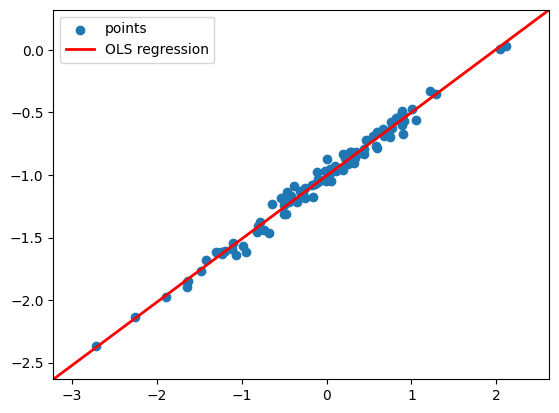

In [64]:
# LESS NOISE
eps = rng.normal(0, 0.05, size=100)
Y = b0 + b1*x + eps

X = ModelSpec([0]).fit_transform(x.reshape(-1, 1))
result = sm.OLS(Y, X).fit()

print(f"{result.rsquared=}")
print(f"{result.conf_int()[1]}")
pred_b0 = result.params[0]
pred_b1 = result.params[1]

ax = subplots()[1]
ax.scatter(x, Y)
xlim = ax.get_xlim()
ylim = [pred_b0 + pred_b1*xlim[0], pred_b0 + pred_b1*xlim[1]]
ax.axline((xlim[0], ylim[0]), (xlim[1], ylim[1]), color='r', ls="-", linewidth=2)

ax.legend(["points", "OLS regression"])

result.rsquared=0.5210784463490641
[0.38287655 0.56505062]


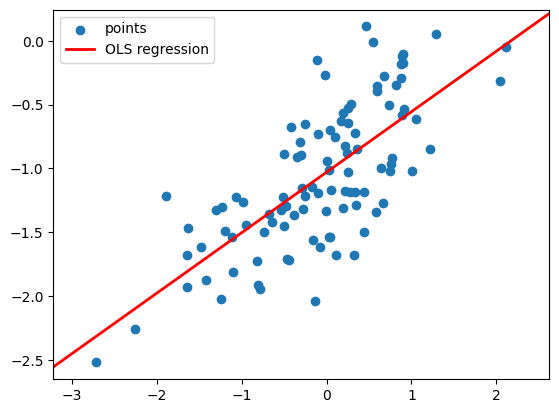

In [63]:
# MORE NOISE
eps = rng.normal(0, 0.4, size=100)
Y = b0 + b1*x + eps

X = ModelSpec([0]).fit_transform(x.reshape(-1, 1))
result = sm.OLS(Y, X).fit()

print(f"{result.rsquared=}")
print(f"{result.conf_int()[1]}")
pred_b0 = result.params[0]
pred_b1 = result.params[1]

ax = subplots()[1]
ax.scatter(x, Y)
xlim = ax.get_xlim()
ylim = [pred_b0 + pred_b1*xlim[0], pred_b0 + pred_b1*xlim[1]]
ax.axline((xlim[0], ylim[0]), (xlim[1], ylim[1]), color='r', ls="-", linewidth=2)

ax.legend(["points", "OLS regression"])